In [ ]:
# from attributed_reduction import *
from src.reduction.reduction import get_comm_coarsed_graph, get_lap_coresed_graph, get_custom_coarsed_graph
from src.reduction.expansion import get_expanded_graph
from src.datasets.dataset_utils import to_nx, nx_to_mol, get_expand_check
import matplotlib.pyplot as plt
import networkx as nx
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import PIL
import pandas as pd
from rdkit.Chem.rdchem import BondType as BT
from src.analysis.rdkit_functions import calculate_base_properties
atom_decoder = ['C', 'N', 'O', 'F', 'B', 'Br', 'Cl', 'I', 'P', 'S', 'Se', 'Si']
atom_encoder = {atom: i for i, atom in enumerate(atom_decoder)}
bonds = {BT.ZERO:0, BT.SINGLE: 1, BT.DOUBLE: 2, BT.TRIPLE: 3, BT.AROMATIC: 4}

2.6642 0.2777042067486799 2.699359407873496


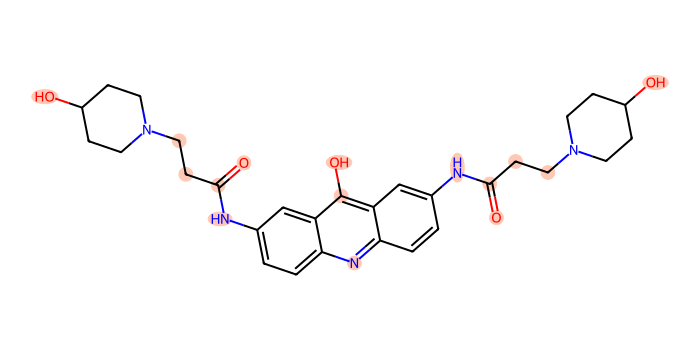

In [69]:
smiles = "C1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)))C"
smiles = "O=C(CCN1CCC(O)CC1)Nc1ccc2nc3ccc(NC(=O)CCN4CCC(O)CC4)cc3c(O)c2c1"



mol = Chem.MolFromSmiles(smiles)



# try:
G = to_nx(smiles, atom_encoder, bonds)
# mol = nx_to_mol(G, atom_decoder, bonds)
    
# except Exception as e:
#     print(f'{e}, retry with kekulize')
#     G = to_nx(smiles, atom_encoder, bonds, kekulize=True)
#     mol = nx_to_mol(G, atom_decoder, bonds)

# print(Chem.MolToSmiles(mol, kekuleSmiles=True))
logP, qed, sa_score = calculate_base_properties(mol)
print(logP, qed, sa_score)

# pos = nx.spring_layout(G)
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G,pos,with_labels=True)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=dict(zip(list(G.edges),G.edges.data('bond_type',0))))
# plt.show()

Draw.MolToImage(mol, size=(700,350), wedgeBonds=True, 
                highlightAtoms=[0,1,2,3,8, 11,16, 35,36, 21,22,23,24,25, 30],
                highlightColor=(1,200/255,180/255),
                )

In [3]:
import pickle
import torch
from torch_geometric.utils import to_dense_batch
from src.datasets.dataset_utils import to_undirect, to_dense_adj
from rdkit.Chem.rdchem import BondType as BT


with open('expanded_graphs_guacamol.pkl', 'rb') as f:
    expanded_graphs = pickle.load(f)



X = torch.tensor(list(nx.get_node_attributes(G,'label').values()))
edge_attr = torch.tensor(list(nx.get_edge_attributes(G,'bond_type').values()))
edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
edge_index, edge_attr = to_undirect(edge_index,edge_attr)
E = to_dense_adj(edge_index, edge_attr=edge_attr)[0]

last_E = E
for i, g in enumerate(expanded_graphs[0]):
    atom_types, edge_types = g
    print(atom_types[:len(X)])
    print(X)
    print(edge_types[:len(X),:len(X)])
    print((atom_types[:len(X)] != X).any())
    print((edge_types[:len(X),:len(X)]!=E).any())
    last_E = edge_types[:len(X),:len(X)]
    break

tensor([0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 9, 2, 2, 1, 0, 0, 1, 0,
        0, 0, 0])
tensor([0, 1, 0, 0, 1, 9, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0,
        0, 0, 0])
tensor([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
    

/home/chensm22/miniconda3/envs/graph-generation/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO

{0: (0, True),
 1: (1, True),
 5: (5, False),
 8: (8, True),
 13: (13, True),
 18: (18, False),
 21: (21, True)}

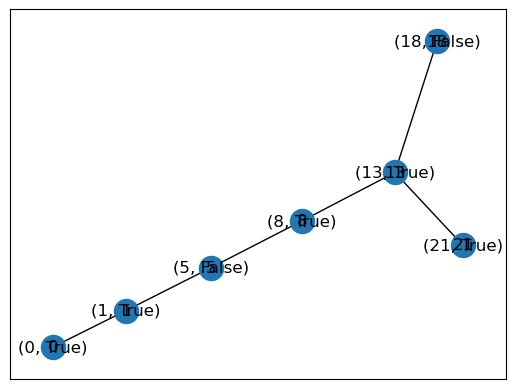

In [24]:
G
coarsed_G = get_custom_coarsed_graph(G=G,max_condense_size=6,reindex=False)
coarsed_G = get_expand_check(G, coarsed_G, [4, 3, 2, 1, 3, 1, 1, 5, 5, 6, 2, 4])
pos = nx.spring_layout(coarsed_G)
nx.draw_networkx(coarsed_G,pos)
nx.draw_networkx_labels(coarsed_G,pos,labels=dict(zip(coarsed_G.nodes,coarsed_G.nodes(data='allow_extend'))))
plt.show()

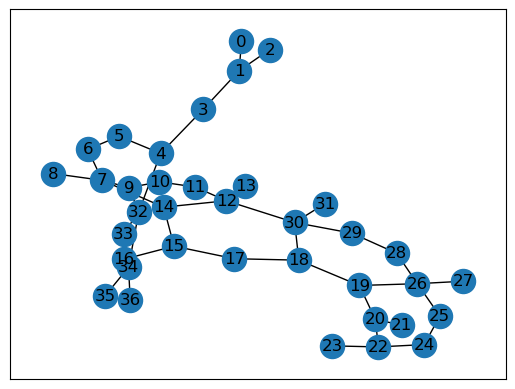

In [ ]:
atom_decoder = ['C', 'N', 'S', 'O', 'F', 'Cl', 'Br', 'H']
atom_encoder = {atom: i for i, atom in enumerate(atom_decoder)}
bonds = {BT.SINGLE: 1, BT.DOUBLE: 2, BT.TRIPLE: 3, BT.AROMATIC: 4}

G = to_nx(smiles,atom_encoder,bonds)
weight = 2
nx.set_edge_attributes(G,1,'weight')
nx.set_edge_attributes(G,{(9,10):{'weight':weight},
                       (10,11):{'weight':weight},
                       (11,12):{'weight':weight},
                       (12,13):{'weight':weight},
                       (13,9):{'weight':weight}})
nx.draw_networkx(G)

NodeDataView({0: {'node_count': 4, 'ring_num': 0, 'node_map': array([0, 1, 2, 3])}, 4: {'node_count': 22, 'ring_num': 5, 'node_map': array([ 4,  5,  6,  7,  9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 22, 24, 25,
       26, 28, 29, 30, 32], dtype=int32)}, 8: {'node_count': 1, 'ring_num': 0, 'node_map': [8]}, 13: {'node_count': 1, 'ring_num': 0, 'node_map': [13]}, 16: {'node_count': 1, 'ring_num': 0, 'node_map': [16]}, 21: {'node_count': 1, 'ring_num': 0, 'node_map': [21]}, 23: {'node_count': 1, 'ring_num': 0, 'node_map': [23]}, 27: {'node_count': 1, 'ring_num': 0, 'node_map': [27]}, 31: {'node_count': 1, 'ring_num': 0, 'node_map': [31]}, 33: {'node_count': 1, 'ring_num': 0, 'node_map': [33]}, 34: {'node_count': 3, 'ring_num': 0, 'node_map': array([34, 35, 36])}})

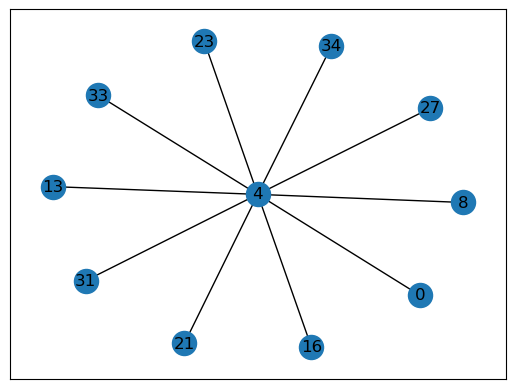

In [ ]:
coarsed_G = get_custom_coarsed_graph(G,reindex=False)
nx.draw_networkx(coarsed_G)
coarsed_G.nodes(data=True)

[ 1. 14.  3.  1.  1.]


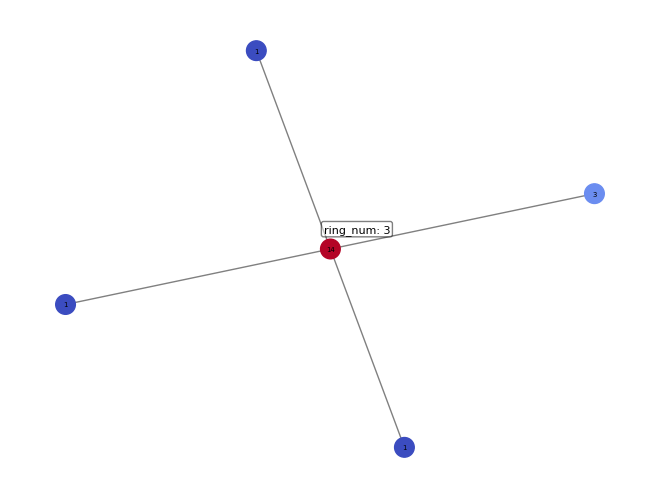

In [ ]:
import numpy as np
graph = coarsed_G
pos = nx.spring_layout(graph, iterations=100)

# 提取节点的 'symbol' 属性并用于颜色映射
symbols = nx.get_node_attributes(graph, 'node_count')  # 获取每个节点的 'symbol' 标签
symbol_values = np.array(list(symbols.values()), dtype=np.float32)  # 转为数值形式的 symbol
print(symbol_values)
vmin, vmax = np.min(symbol_values), np.max(symbol_values)  # 确定颜色范围

# 绘制图形
plt.figure()

# 绘制节点，颜色根据 symbol 值映射，使用 colormap 'coolwarm'
nx.draw(graph, pos, font_size=5, node_size=200, with_labels=True, labels=symbols, 
        node_color=symbol_values, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax, edge_color='grey')

ring_nums = nx.get_node_attributes(graph, 'ring_num')  # 获取每个节点的 'symbol' 标签
if ring_nums:
    for node, ring_num_value in ring_nums.items():
        if ring_num_value != 0:
            x, y = pos[node]  # 获取节点的位置
            plt.text(x + .1, y+.1, s=f"ring_num: {ring_num_value}", fontsize=8, color='black', 
                    horizontalalignment='center', verticalalignment='center', 
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.2'))


In [ ]:
import numpy as np
graph = coarsed_G_relabeled
pos = nx.spring_layout(graph, iterations=100)

# 提取节点的 'symbol' 属性并用于颜色映射
symbols = nx.get_node_attributes(graph, 'node_count')  # 获取每个节点的 'symbol' 标签
symbol_values = np.array(list(symbols.values()), dtype=np.float32)  # 转为数值形式的 symbol
print(symbol_values)
vmin, vmax = np.min(symbol_values), np.max(symbol_values)  # 确定颜色范围

# 绘制图形
plt.figure()

# 绘制节点，颜色根据 symbol 值映射，使用 colormap 'coolwarm'
nx.draw(graph, pos, font_size=5, node_size=200, with_labels=True, labels=symbols, 
        node_color=symbol_values, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax, edge_color='grey')

ring_nums = nx.get_node_attributes(graph, 'ring_num')  # 获取每个节点的 'symbol' 标签
if ring_nums:
    for node, ring_num_value in ring_nums.items():
        if ring_num_value != 0:
            x, y = pos[node]  # 获取节点的位置
            plt.text(x + .1, y+.1, s=f"ring_num: {ring_num_value}", fontsize=8, color='black', 
                    horizontalalignment='center', verticalalignment='center', 
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.2'))


NameError: name 'coarsed_G_relabeled' is not defined

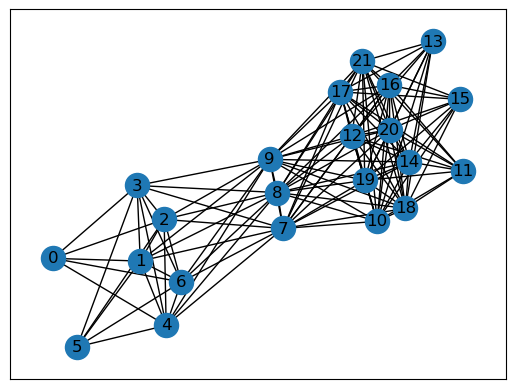

In [ ]:
expanded_G = get_expanded_graph(coarsed_G)
nx.draw_networkx(expanded_G)